In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
excel_file = r"C:\Users\pravinkumar.mario\Downloads\COSS\CALCULATIONS.xlsx"


## Direct Mapping - Assignment

In [20]:
df = pd.read_excel(excel_file, sheet_name="Direct Mapping")

In [21]:
title = "Direct Mapping - Cache Hit Ratio vs Block Size (Data Cache only)"
fig_title = "COSS_Assignment_Part_1_b"
df = df.iloc[:, :6]

In [22]:
df["Block Size"] = df["Block Size"].astype("category")
df["Cache Size"] = df["Cache Size"].astype("category")
df["DC Hit Ratio"] = (df["Data Hits"] / (df["Data Hits"] + df["Data Misses"]))*100
df["DC Miss Ratio"] = (df["Data Misses"] / (df["Data Hits"] + df["Data Misses"]))*100
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Block Size          12 non-null     category
 1   Cache Size          12 non-null     category
 2   Instruction Hits    12 non-null     int64   
 3   Instruction Misses  12 non-null     int64   
 4   Data Hits           12 non-null     int64   
 5   Data Misses         12 non-null     int64   
 6   DC Hit Ratio        12 non-null     float64 
 7   DC Miss Ratio       12 non-null     float64 
dtypes: category(2), float64(2), int64(4)
memory usage: 1.0 KB


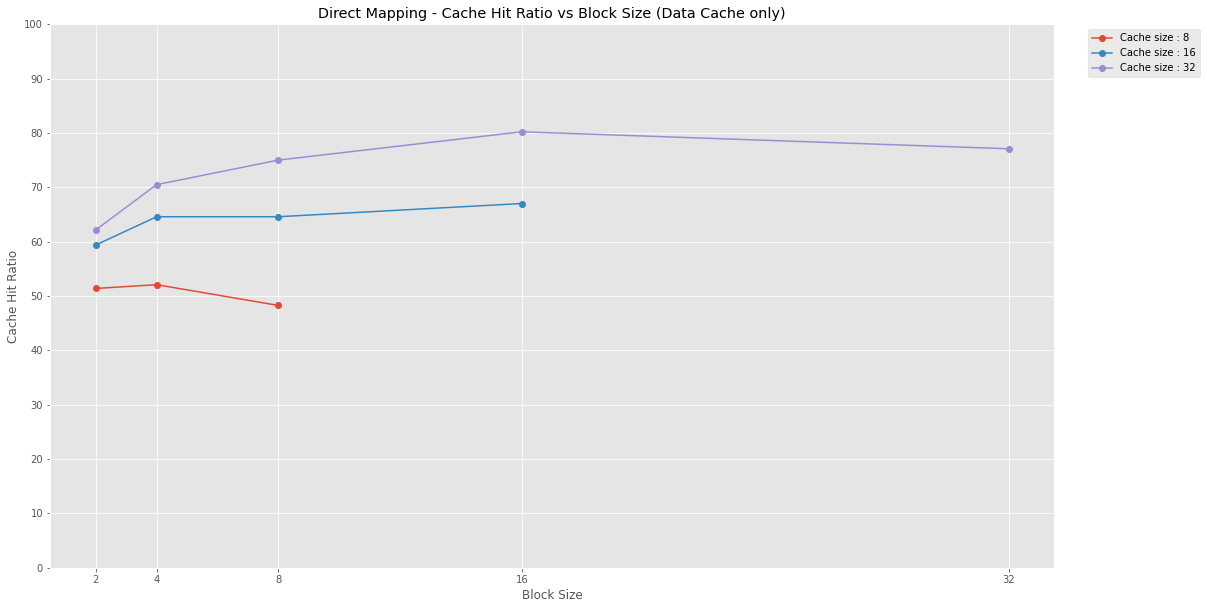

In [23]:
plt.figure(figsize=(18,10))
for name, group in df.groupby(by=["Cache Size"]):
    # x
    label = f"Cache size : {name}"
    x = group["Block Size"]
    y = group["DC Hit Ratio"]
    plt.plot(x, y, "-o", label=label,)

plt.xlabel("Block Size")
plt.xticks([2, 4, 8, 16, 32])
plt.yticks(list(np.arange(0, 110, 10)))
plt.ylabel("Cache Hit Ratio")
plt.title(title)
plt.legend(loc=1, bbox_to_anchor=(1.15,1))
plt.savefig(f"{fig_title}.jpg", pad_inches=0.25, bbox_inches="tight")
plt.show()
plt.close()

In [24]:
ndf = pd.DataFrame()
for name, group in df.groupby(by=["Cache Size"]):
    ndf = pd.concat([ndf, group])
ndf = ndf.drop(
    labels=["Instruction Hits", "Instruction Misses"], 
    axis = 1
)
ndf = ndf.set_index(["Block Size", "Cache Size"])
# ndf.index.names
ndf

,,Data Hits,Data Misses,DC Hit Ratio,DC Miss Ratio
Block Size,Cache Size,,,,
2,8,148,140,51.388889,48.611111
4,8,150,138,52.083333,47.916667
8,8,139,149,48.263889,51.736111
2,16,171,117,59.375000,40.625000
4,16,186,102,64.583333,35.416667
8,16,186,102,64.583333,35.416667
16,16,193,95,67.013889,32.986111
2,32,179,109,62.152778,37.847222
4,32,203,85,70.486111,29.513889


## Assosciative Mapping

In [25]:
am_df = pd.read_excel(excel_file, sheet_name="Assosciative").iloc[:, :7]

In [26]:
am_df["Replacement Algorithm"] = am_df["Replacement Algorithm"].astype("category")
am_df["Cache Size"] = am_df["Cache Size"] .astype("category")
am_df["Block Size"] = am_df["Block Size"].astype("category")
am_df = am_df.drop(
    labels=["Instruction Hits", "Instruction Misses"], axis=1
)
am_df["DC Hit Ratio"] = (am_df["Data Hits"] / (am_df["Data Hits"] + am_df["Data Misses"])) * 100
am_df["DC Miss Ratio"] = (am_df["Data Misses"] / (am_df["Data Hits"] + am_df["Data Misses"])) * 100

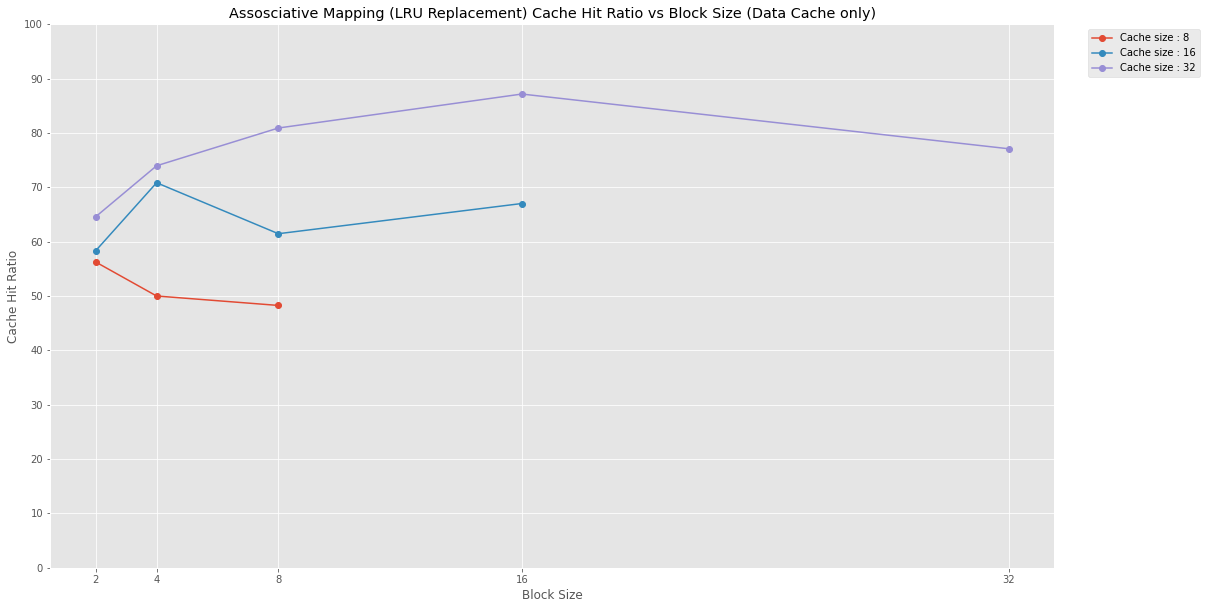

In [27]:
am_title = "Assosciative Mapping (LRU Replacement) Cache Hit Ratio vs Block Size (Data Cache only)"
am_file_name = "COSS_Assignment_Part_2_b"
lru_am_df = am_df[am_df["Replacement Algorithm"] == "LRU"]
lru_am_df = lru_am_df[~lru_am_df["Cache Size"].isin([4,64])]
plt.figure(figsize=(18,10))
# for name, group in am_df.groupby(by=["Cache Size", "Replacement Algorithm"]):
for name, group in lru_am_df.groupby(by=["Cache Size"]):
    if name in [4, 64]:
        continue
    # x
    label = f"Cache size : {name}"
    x = group["Block Size"]
    y = group["DC Hit Ratio"]
    plt.plot(x, y, "-o", label=label,)
plt.xlabel("Block Size")
plt.xticks([2, 4, 8, 16, 32])
plt.yticks(list(np.arange(0, 110, 10)))
plt.ylabel("Cache Hit Ratio")
plt.title(am_title)
plt.legend(loc=1, bbox_to_anchor=(1.15,1))
plt.savefig(f"{am_file_name}.jpg", pad_inches=0.25, bbox_inches="tight")
plt.show()
plt.close()

In [28]:
lru_am_df

,Block Size,Cache Size,Replacement Algorithm,Data Hits,Data Misses,DC Hit Ratio,DC Miss Ratio
1,2,8,LRU,162,126,56.250000,43.750000
2,4,8,LRU,144,144,50.000000,50.000000
3,8,8,LRU,139,149,48.263889,51.736111
4,2,16,LRU,168,120,58.333333,41.666667
5,4,16,LRU,204,84,70.833333,29.166667
6,8,16,LRU,177,111,61.458333,38.541667
7,16,16,LRU,193,95,67.013889,32.986111
8,2,32,LRU,186,102,64.583333,35.416667
9,4,32,LRU,213,75,73.958333,26.041667
10,8,32,LRU,233,55,80.902778,19.097222


## Set Assosciative Mapping

In [29]:
sa_df = pd.read_excel(excel_file, sheet_name=r"Set Assosciative").iloc[:, :8]
sa_df = sa_df.drop(
    labels=["Instruction Hits", "Instruction Misses"], axis=1
)
sa_df["Block Size"] = sa_df["Block Size"].astype("category")
sa_df["Cache Size"] = sa_df["Cache Size"].astype("category")
sa_df["Set Block"] = sa_df["Set Block"].astype("category")
sa_df["Replacement Algorithm"] = sa_df["Replacement Algorithm"].astype("category")
sa_df["DC Hit Ratio"] = (sa_df["Data Hits"] / (sa_df["Data Hits"] + sa_df["Data Misses"]))*100
sa_df["DC Miss Ratio"] = (sa_df["Data Misses"] / (sa_df["Data Hits"] + sa_df["Data Misses"]))*100
sa_df = sa_df[sa_df["Set Block"] == "2-Way"]

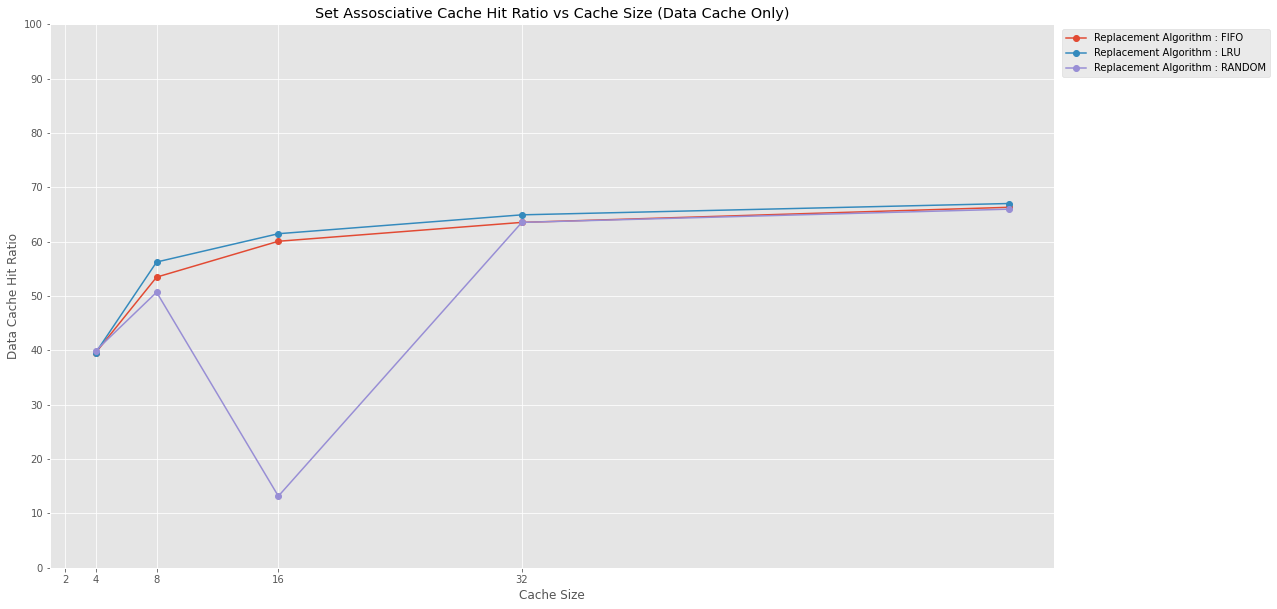

In [30]:
sa_title = "Set Assosciative Cache Hit Ratio vs Cache Size (Data Cache Only)"
sa_fig_title = "COSS_Assignment_Part_3_b"
plt.figure(figsize=(18,10))
for name, group in sa_df.groupby(["Replacement Algorithm"]):
    x = group["Cache Size"]
    y = group["DC Hit Ratio"]
    label = f"Replacement Algorithm : {name}"
    plt.plot(x, y, "-o", label=label)
#     # display(group)
plt.xlabel("Cache Size")
plt.xticks([2, 4, 8, 16, 32])
plt.yticks(list(np.arange(0, 110, 10)))
plt.ylabel("Data Cache Hit Ratio")
plt.title(sa_title)
plt.legend(loc=1, bbox_to_anchor=(1.22,1))
plt.savefig(f"{sa_fig_title}.jpg", pad_inches=0.25, bbox_inches="tight")
plt.show()
plt.close()
#     # display(group)

In [31]:
sa_df

,Block Size,Cache Size,Set Block,Replacement Algorithm,Data Hits,Data Misses,DC Hit Ratio,DC Miss Ratio
0,2,4,2-Way,LRU,114,174,39.583333,60.416667
1,2,8,2-Way,LRU,162,126,56.250000,43.750000
2,2,16,2-Way,LRU,177,111,61.458333,38.541667
3,2,32,2-Way,LRU,187,101,64.930556,35.069444
4,2,64,2-Way,LRU,193,95,67.013889,32.986111
7,2,4,2-Way,FIFO,114,174,39.583333,60.416667
8,2,8,2-Way,FIFO,154,134,53.472222,46.527778
9,2,16,2-Way,FIFO,173,115,60.069444,39.930556
10,2,32,2-Way,FIFO,183,105,63.541667,36.458333
11,2,64,2-Way,FIFO,191,97,66.319444,33.680556
